In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# !pip install tensorflow_decision_forests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 63.8 MB/s eta 0:00:00


In [2]:
# Setup feedback system
# from learntools.core import binder
# binder.bind(globals())
# from learntools.computer_vision.ex1 import *

# Imports
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
import pandas as pd 
# import tensorflow_decision_forests as tfdf
# from tensorflow.keras.preprocessing import image_dataset_from_directory

# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells






In [3]:
# Set path abbrivate
prepath="/content/gdrive/My Drive/data/"
# Load training and validation sets
face=pd.read_csv("/content/gdrive/My Drive/data/faceLabel.csv")

# read faceData
serialized_tensor = tf.io.read_file(prepath + "faceDataset")
data = tf.io.parse_tensor(serialized_tensor, out_type=tf.uint8)

# convert dataframe to tensor
label_tensor=tf.convert_to_tensor(face["sex_label"].values)




In [4]:
data

<tf.Tensor: shape=(128, 128), dtype=uint8, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)>

In [7]:
serialized_tensor

<tf.Tensor: shape=(), dtype=string, numpy=b'\x08\x04\x12\n\x12\x03\x08\x80\x01\x12\x03\x08\x80\x01"\x80\x80\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x06\x05\x07\x10\x19\x1c\x17\x11\x13\x15\x1f\x1d\x15\x11*31,(%$\x1b\x14\r\x08\t\t\x07\x05\x0e\x1c-8.\x13\x04\x00\x00\x00\x00\x00\x00\x00\x00\x02\t\x08\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x06\x0f\x10\x12\x1a$&!\x19\x18\x12\x1d\x1b\x10\x11-8:1(#"\x1a\x13\x0f\x08\x05\x04\x04\x06\t\x13\x1e&!\x11\x06\x01\x00\x00\x00\x00\x00\x00\x00\x00\x05\n\x06\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [5]:
label_tensor

<tf.Tensor: shape=(3993,), dtype=int64, numpy=array([1, 1, 1, ..., 0, 0, 0])>

In [ ]:
# merge label and data
# 1. 1D data
faceMerge=tf.stack([data, label_tensor], axis=-1)
# 2. 2D data
# faceMerge=tf.concat([data, tf.expand_dims(label_tensor, axis=-1)], axis=-1)

In [ ]:
# Data Pipeline
def convert_to_float(label,image ):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

In [ ]:
ds_train

The **InceptionV1** model pretrained on ImageNet is available in the [TensorFlow Hub](https://www.tensorflow.org/hub/) repository, but we'll load it from a local copy. Run this cell to load InceptionV1 for your base.

In [ ]:
# !pip install mmdnn

In [ ]:
# !mmconvert -sf pytorch -in http://www.robots.ox.ac.uk/~albanie/models/pytorch-mcn/vgg_face_dag.pth -df tensorflow -om /content/gdrive/data/vgg_face.pb   

In [ ]:
import tensorflow_hub as hub

# pretrained_base = tf.keras.models.load_model(
#     '/content/gdrive/My Drive/data/vgg_face.pb'
# )
# pretrained_base = hub.KerasLayer("https://tfhub.dev/google/imagenet/inception_resnet_v2/classification/5")
pretrained_base = hub.KerasLayer("https://tfhub.dev/google/imagenet/inception_v1/classification/5")

# 1) Define Pretrained Base #

Now that you have a pretrained base to do our feature extraction, decide whether this base should be trainable or not.

In [ ]:
# YOUR_CODE_HERE
pretrained_base.trainable = False



In [ ]:
# Lines below will give you a hint or solution code
#q_1.hint()
#q_1.solution()

# 2) Attach Head #

Now that the base is defined to do the feature extraction, create a head of `Dense` layers to perform the classification, following this diagram:

<figure>
<img src="https://storage.googleapis.com/kaggle-media/learn/images/i5VU7Ry.png" alt="Diagram of the dense head.">
</figure>


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    pretrained_base,
    layers.Flatten(),
    # YOUR CODE HERE. Attach a head of dense layers.
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])


# 3) Train #

Before training a model in Keras, you need to specify an *optimizer* to perform the gradient descent, a *loss function* to be minimized, and (optionally) any *performance metrics*. The optimization algorithm we'll use for this course is called ["Adam"](https://keras.io/api/optimizers/adam/), which generally performs well regardless of what kind of problem you're trying to solve.

The loss and the metrics, however, need to match the kind of problem you're trying to solve. Our problem is a **binary classification** problem: `Car` coded as 0, and `Truck` coded as 1. Choose an appropriate loss and an appropriate accuracy metric for binary classification.

In [ ]:
# YOUR CODE HERE: what loss function should you use for a binary
# classification problem? (Your answer for each should be a string.)
optimizer = tf.keras.optimizers.Adam(epsilon=0.01)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)



In [ ]:
history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=30,
)

Epoch 1/30


ValueError: ignored

Run the cell below to plot the loss and metric curves for this training run.

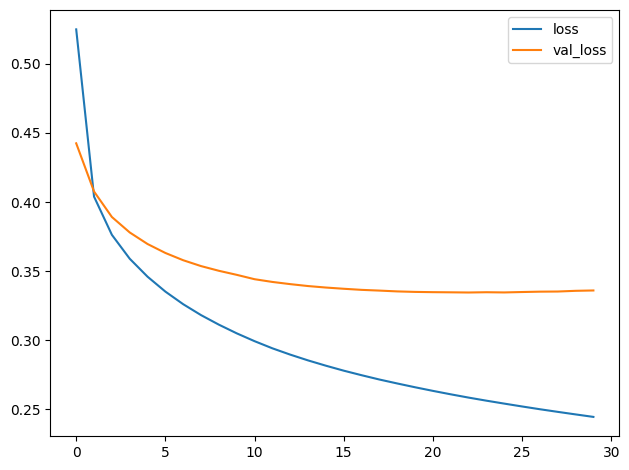

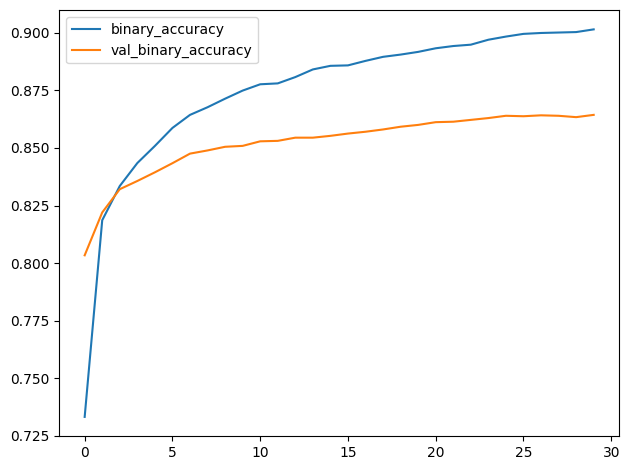

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

# 4) Examine Loss and Accuracy #

Do you notice a difference between these learning curves and the curves for VGG16 from the tutorial? What does this difference tell you about what this model (InceptionV2) learned compared to VGG16? Are there ways in which one is better than the other? Worse?

After you've thought about it, run the cell below to see the answer.

# Conclusion #

In this first lesson, you learned the basics of **convolutional image classifiers**, that they consist of a **base** for extracting features from images, and a **head** which uses the features to decide the image's class. You also saw how to build a classifier with **transfer learning** on pretrained base. 

# Keep Going #

Move on to [**Lesson 2**](https://www.kaggle.com/ryanholbrook/convolution-and-relu) for a detailed look at how the base does this feature extraction. (It's really cool!)

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/computer-vision/discussion) to chat with other learners.*